In [ ]:
#importing the Libraies
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv("/content/drive/My Drive/dataset/CKD.csv")

In [ ]:
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.000000,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.000000,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.000000,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.000000,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.000000,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,219.000000,...,37.000000,9800.000000,4.400000,no,no,no,yes,poor,no,yes
395,51.492308,70.000000,c,0.0,2.0,normal,normal,notpresent,notpresent,220.000000,...,27.000000,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes
396,51.492308,70.000000,c,3.0,0.0,normal,normal,notpresent,notpresent,110.000000,...,26.000000,9200.000000,3.400000,yes,yes,no,poor,poor,no,yes
397,51.492308,90.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,207.000000,...,38.868902,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes


In [ ]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [ ]:
dataset.columns

Index(['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hrmo', 'pcv',
       'wc', 'rc', 'sg_b', 'sg_c', 'sg_d', 'sg_e', 'rbc_normal', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_yes', 'pe_yes', 'ane_yes', 'classification_yes'],
      dtype='object')

In [ ]:
indep=dataset[['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hrmo', 'pcv',
       'wc', 'rc', 'sg_b', 'sg_c', 'sg_d', 'sg_e', 'rbc_normal', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_yes', 'pe_yes', 'ane_yes']]
dep=dataset['classification_yes']

In [ ]:
#split into training set and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train_= sc.fit_transform(X_train)
# X_test_= sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'n_estimators':[10,100]}



grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1')

# fitting the model for grid search
grid.fit(x_train, y_train)




Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='f1', verbose=3)

In [ ]:
# print best parameter after tuning
#print(grid.best_params_)
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(x_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)



# print classification report
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)




In [ ]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}


In [ ]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)


The f1_macro value for best parameter {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}: 0.9849624060150376


In [ ]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[50  1]
 [ 1 81]]


In [ ]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.99      0.99      0.99        82

    accuracy                           0.98       133
   macro avg       0.98      0.98      0.98       133
weighted avg       0.98      0.98      0.98       133



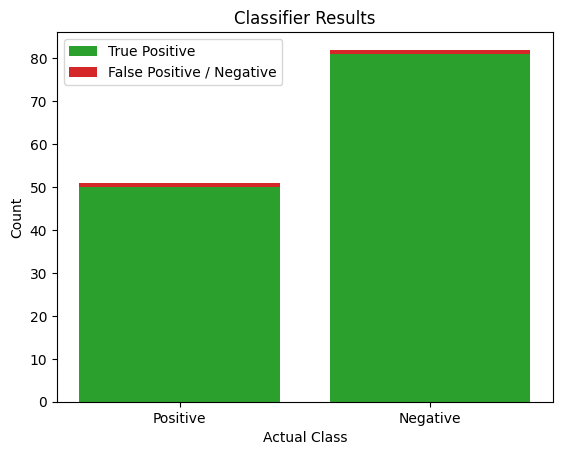

In [ ]:
tp, fp, tn, fn = cm.ravel()
results = np.array([[tp, fp], [fn, tn]])
labels = ['Positive', 'Negative']
colors = ['tab:green', 'tab:red']

plt.bar(labels, results[:, 0], color=colors[0], label='True Positive')
plt.bar(labels, results[:, 1], bottom=results[:, 0], color=colors[1], label='False Positive / Negative')

plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.title('Classifier Results')
plt.legend()
plt.show()